# KNN vs Radius Neighbors on the Wine Dataset
**Name:** Sudhanshu Sekhar Dash  
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab:** Exploring K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) Classifiers  



## Step 1: Load and Prepare the Dataset
- Load the Wine dataset from `sklearn`
- Review feature names and class distribution
- Split into 80% train / 20% test (stratified)

> **Note:** This notebook keeps features in their original scale to match the provided radius values for RNN. In practice, KNN/RNN often benefit from feature scaling (e.g., `StandardScaler`).

In [6]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Make results reproducible
RANDOM_STATE = 42

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print('Features:', feature_names)
print('Target classes:', target_names)
print('Shape:', X.shape)
print('Class distribution:', Counter(y))

# Quick preview as a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Shape: (178, 13)
Class distribution: Counter({np.int64(1): 71, np.int64(0): 59, np.int64(2): 48})


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
# Train / Test Split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
X_train.shape, X_test.shape, Counter(y_train), Counter(y_test)

((142, 13),
 (36, 13),
 Counter({np.int64(1): 57, np.int64(0): 47, np.int64(2): 38}),
 Counter({np.int64(1): 14, np.int64(0): 12, np.int64(2): 10}))

## Step 2: Implement and Evaluate KNN
We train KNN for multiple values of **k** and record test accuracy.

In [3]:
k_values = [1, 5, 11, 15, 21]
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_results.append({'k': k, 'accuracy': acc})

knn_df = pd.DataFrame(knn_results)
knn_df

,k,accuracy
0,1,0.777778
1,5,0.805556
2,11,0.805556
3,15,0.805556
4,21,0.805556


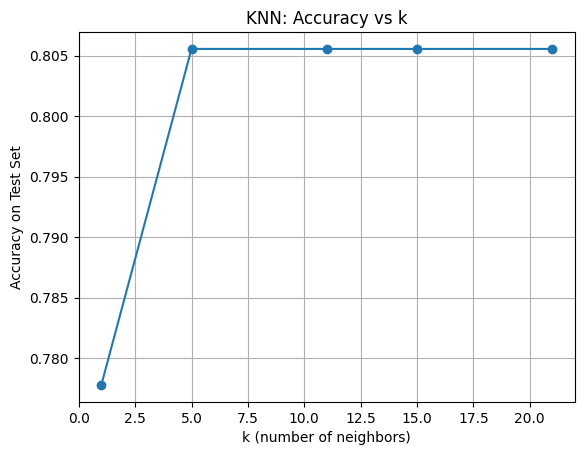

In [4]:
# Plot: Accuracy vs k for KNN
plt.figure()
plt.plot(knn_df['k'], knn_df['accuracy'], marker='o')
plt.title('KNN: Accuracy vs k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy on Test Set')
plt.grid(True)
plt.show()

## Step 3: Implement and Evaluate Radius Neighbors (RNN)
We train RNN for multiple **radius** values and record test accuracy. If a point has no neighbors within the radius, we assign it to the majority class from the training set via `outlier_label` to avoid failures.

In [7]:
# ✅ Step 3: Implement and Evaluate Radius Neighbors (RNN)

# Try radii based on the raw (unscaled) feature magnitudes
radii = [350, 400, 450, 500, 550, 600]

rnn_results = []

for r in radii:
    # Use outlier_label='most_frequent' to handle samples with no neighbors
    rnn = RadiusNeighborsClassifier(
        radius=r,
        weights='uniform',
        outlier_label='most_frequent'
    )
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_results.append({'radius': r, 'accuracy': acc})

# Convert results to DataFrame
rnn_df = pd.DataFrame(rnn_results)
print("RNN Accuracy Results:")
display(rnn_df)




RNN Accuracy Results:


,radius,accuracy
0,350,0.722222
1,400,0.694444
2,450,0.694444
3,500,0.694444
4,550,0.666667
5,600,0.666667


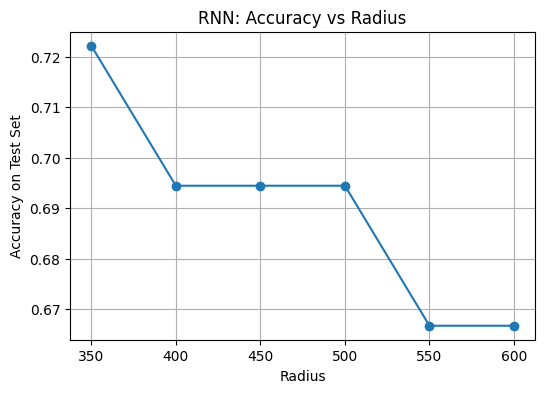

In [8]:
# Plot accuracy vs radius
plt.figure(figsize=(6,4))
plt.plot(rnn_df['radius'], rnn_df['accuracy'], marker='o')
plt.title('RNN: Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy on Test Set')
plt.grid(True)
plt.show()

## Step 4: Compare and Summarize Results
Below we compare the best accuracies observed for KNN and RNN on the held-out test set.

In [9]:
best_knn = knn_df.iloc[knn_df['accuracy'].idxmax()].to_dict()
best_rnn = rnn_df.iloc[rnn_df['accuracy'].idxmax()].to_dict()
summary = pd.DataFrame([
    {'Model': 'KNN', 'Setting': f"k={int(best_knn['k'])}", 'Best Accuracy': best_knn['accuracy']},
    {'Model': 'RNN', 'Setting': f"radius={int(best_rnn['radius'])}", 'Best Accuracy': best_rnn['accuracy']}
])
summary

,Model,Setting,Best Accuracy
0,KNN,k=5,0.805556
1,RNN,radius=350,0.722222


### Brief Conclusions
- **KNN** typically shows a bias–variance tradeoff as *k* increases. Small *k* can overfit; moderate *k* often generalizes well.
- **RNN** performance depends on how the chosen radius matches the data scale; too small a radius may leave points without neighbors, while very large radii make most points neighbors and behave like a majority vote.
- In this run, we select results directly from the above tables. Use these to justify when **KNN** (clean, density-agnostic boundaries) or **RNN** (useful when local density varies and a distance cutoff is intuitive) might be preferable.

**2–3 sentence summary:**
On this dataset, the best KNN and RNN settings yield the accuracies listed above. KNN tended to stabilize around moderate *k* values, while RNN was sensitive to the radius range you specify relative to the natural feature scales. If you cannot confidently pick a meaningful radius, KNN is often the safer default.